# Guided Capstone Step 6. Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [179]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, explained_variance_score
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error

os.getcwd()

path="C:/MY FOLDER/SpringBoard/Case Studies/Blue Mountain Resort"
os.chdir(path)

In [180]:
df = pd.read_csv("step3_output.csv")

dfo = df
df

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,3939,2500,250,1,0,0,2,2,...,1.0,1610.0,113.000000,150.000000,60,669.000000,65.000000,85.00000,150.000000,550
1,Eaglecrest Ski Area,Alaska,2600,1540,1200,0,0,0,0,0,...,2.0,640.0,60.000000,45.000000,44,350.000000,47.000000,53.00000,90.000000,0
2,Hilltop Ski Area,Alaska,2090,294,1796,0,0,0,0,0,...,1.0,30.0,30.000000,150.000000,36,69.000000,30.000000,34.00000,152.000000,30
3,Arizona Snowbowl,Arizona,11500,2300,9200,0,0,1,0,2,...,2.0,777.0,104.000000,122.000000,81,260.000000,89.000000,89.00000,122.000000,0
4,Sunrise Park Resort,Arizona,11100,1800,9200,0,0,0,1,2,...,1.2,800.0,80.000000,115.000000,49,250.000000,74.000000,78.00000,104.000000,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,Meadowlark Ski Lodge,Wyoming,9500,1000,8500,0,0,0,0,0,...,1.5,300.0,174.873239,115.103943,9,185.316456,57.916957,64.16681,120.053003,0
326,Sleeping Giant Ski Resort,Wyoming,7428,810,6619,0,0,0,0,0,...,1.0,184.0,18.000000,61.000000,81,310.000000,42.000000,42.00000,77.000000,0
327,Snow King Resort,Wyoming,7808,1571,6237,0,0,0,0,1,...,1.0,400.0,250.000000,121.000000,80,300.000000,59.000000,59.00000,123.000000,110
328,Snowy Range Ski & Recreation Area,Wyoming,9663,990,8798,0,0,0,0,0,...,0.7,75.0,30.000000,131.000000,59,250.000000,49.000000,49.00000,120.053003,0


## Fit Models with Training Dataset

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

In [181]:


# Declare an explanatory variable, called X,and assign it the result of dropping 'Name','state' and 'AdultWeekend' from the df
#X = df.drop(['Name','state','AdultWeekend','summit_elev','base_elev'], axis=1)
#X = df.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen','clusters','state','summit_elev','base_elev'], axis=1)
#X = df.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen','state','summit_elev','base_elev'], axis=1)
X = df.drop(['Name','AdultWeekend','AdultWeekday','daysOpenLastYear','projectedDaysOpen','state','summit_elev','base_elev'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
Y = df.loc[:,'AdultWeekend']


In [182]:
#Preprocessing - Scaling

scaler = preprocessing.StandardScaler().fit(X)
X_scaled=scaler.transform(X) 
print(X_scaled.shape)
scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
y = Y.ravel()
print(scaled_df)

(330, 18)
     vertical_drop     trams  fastEight  fastSixes  fastQuads      quad  \
0         1.357286  1.479658  -0.055132  -0.284078   0.447306  0.814091   
1         0.342945 -0.308940  -0.055132  -0.284078  -0.463873 -0.712330   
2        -0.973585 -0.308940  -0.055132  -0.284078  -0.463873 -0.712330   
3         1.145965 -0.308940  -0.055132   1.252736  -0.463873  0.814091   
4         0.617663 -0.308940  -0.055132  -0.284078  -0.008283  0.814091   
..             ...       ...        ...        ...        ...       ...   
325      -0.227622 -0.308940  -0.055132  -0.284078  -0.463873 -0.712330   
326      -0.428377 -0.308940  -0.055132  -0.284078  -0.463873 -0.712330   
327       0.375700 -0.308940  -0.055132  -0.284078  -0.463873  0.050881   
328      -0.238188 -0.308940  -0.055132  -0.284078  -0.463873 -0.712330   
329      -0.121961 -0.308940  -0.055132  -0.284078  -0.463873 -0.712330   

       triple    double   surface  total_chairs      Runs  TerrainParks  \
0   -0.927831 

In [183]:

#Added clusters after scaling removing the clusters formed in Step3 from the step3_output.csv

from sklearn.cluster import KMeans

# This code will fit the k-means algorithm with our k parameter set to three, and plot the results. Cool, huh? 
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit(scaled_df)
identified_clusters = y_kmeans3.predict(scaled_df)
#clustered_data_scaled = df.copy()
#clustered_data_scaled['Clusters'] = identified_clusters
df['Clusters'] = identified_clusters
df

X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.25, random_state=1)


In [178]:
#Applying the model

lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
y_pred = model.predict(X_test)
evs3 = explained_variance_score(y_test, y_pred)
mae3 = mean_absolute_error(y_test, y_pred)
lm.intercept_
df_model = pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
df_model

,Coefficient
vertical_drop,8.653031
Snow Making_ac,5.697337
quad,4.349958
triple,3.380091
trams,3.049388
fastQuads,2.957595
fastEight,2.359373
surface,2.201842
total_chairs,2.054977
TerrainParks,1.473792


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [159]:
df= dfo
df[df['Name'].str.contains('Big Mountain')]

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Clusters
151,Big Mountain Resort,Montana,6817,2353,4464,0,0,0,3,2,...,3000.0,600.0,123.0,72,333.0,81.0,81.0,123.0,600,2


**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [160]:
print(y_pred)

[ 54.6853503   79.98726993  81.2172015   85.45668847  82.16683265
  71.26737283  65.06213745  58.43488829  68.54916776  81.38762584
  47.18890561  77.51413378  70.59522075  59.42360065  51.33398887
  76.98300559  49.68565416  70.25146795  65.26209176  53.48356176
  76.2762652   44.91960711  49.40741538  60.12875766  60.64575376
  95.35622057  65.16378114 162.25446482  62.90969415  62.31796385
  56.4026251   78.8808169   68.63154704  61.19049146  68.50426747
  53.05086091  40.4303121   49.11010735  49.68516542  41.63633082
  54.82373408  69.44959703  67.05694072  73.59274818  58.85084897
  65.68284468  76.12784086 116.64159185  47.80048005  61.79543857
  47.28199417  77.85815477  64.30310957  54.3736469   50.33194309
  55.99939195  76.91513403  50.00062288  91.39025067  81.51997783
  57.7617721   57.01625351  48.18620388  54.26298074  67.5939986
  54.96545776  50.26152531  76.02090045  57.38257847  49.81284124
  61.08535668  99.85452903  52.3172574   51.83107385  60.12736622
  56.273126

**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [161]:
print(Y)

0      85.00000
1      53.00000
2      34.00000
3      89.00000
4      78.00000
         ...   
325    64.16681
326    42.00000
327    59.00000
328    49.00000
329    49.00000
Name: AdultWeekend, Length: 330, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

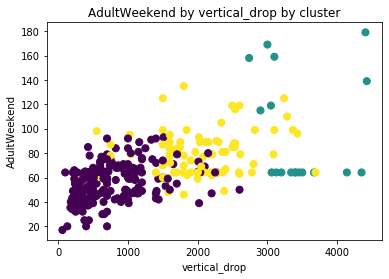

In [162]:
plt.scatter(df['vertical_drop'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
#plt.scatter(df['summit_elev'], df['vertical_drop'], c='black', s=100)
plt.xlabel('vertical_drop')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by vertical_drop by cluster')
plt.savefig('figures/fig1.png',bbox_inches='tight')

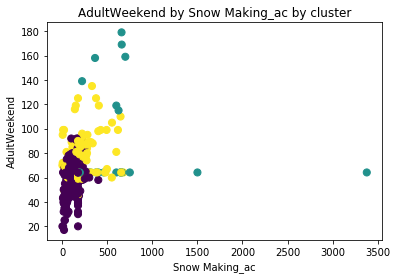

In [163]:
plt.scatter(df['Snow Making_ac'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('Snow Making_ac')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by Snow Making_ac by cluster')
plt.savefig('figures/fig2.png',bbox_inches='tight')

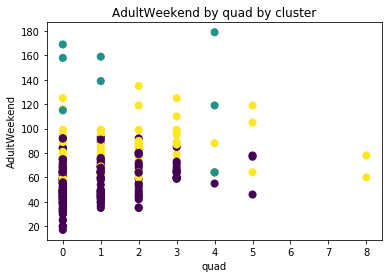

In [164]:
plt.scatter(df['quad'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('quad')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by quad by cluster')
plt.savefig('figures/fig3.png',bbox_inches='tight')

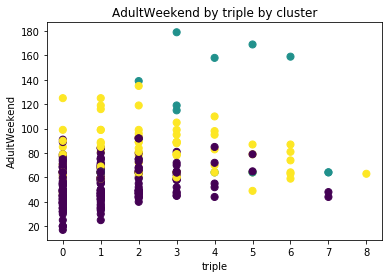

In [165]:
plt.scatter(df['triple'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('triple')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by triple by cluster')
plt.savefig('figures/fig4.png',bbox_inches='tight')

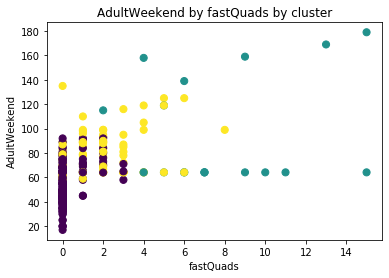

In [166]:
plt.scatter(df['fastQuads'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('fastQuads')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by fastQuads by cluster')
plt.savefig('figures/fig5.png',bbox_inches='tight')

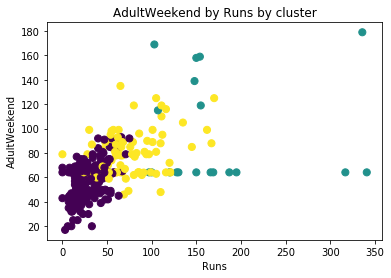

In [167]:
plt.scatter(df['Runs'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('Runs')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by Runs by cluster')
plt.savefig('figures/fig6.png',bbox_inches='tight')

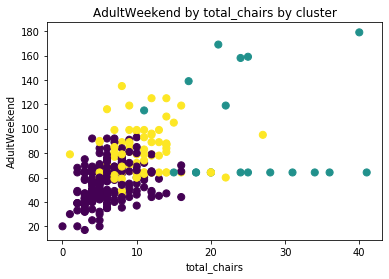

In [168]:
plt.scatter(df['total_chairs'], df['AdultWeekend'], c=df['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.xlabel('total_chairs')
plt.ylabel('AdultWeekend')
plt.title('AdultWeekend by total_chairs by cluster')
plt.savefig('figures/fig7.png',bbox_inches='tight')

In [169]:
#df.groupby("Clusters", sort=False)["state"].count()
#df.groupby("Clusters", sort=False)["AdultWeekend"].count()
display(df.sort_values(by='Clusters'))
df.to_csv("ClusteredData.csv", index=False)

,Name,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Clusters
164,King Pine,New Hampshire,850,350,500,0,0,0,0,0,...,48.0,45.0,105.000000,57,120.0,42.0,58.0,107.0,23,0
191,Holiday Mountain,New York,1550,400,1150,0,0,0,0,1,...,37.0,37.0,75.000000,60,50.0,27.0,42.0,85.0,37,0
193,Holimont Ski Area,New York,2260,700,1560,0,0,0,1,1,...,135.0,135.0,110.000000,57,180.0,62.0,75.0,119.0,0,0
194,Hunt Hollow Ski Club,New York,2030,825,1000,0,0,0,0,0,...,400.0,400.0,115.103943,52,130.0,48.0,58.0,75.0,400,0
197,Labrador Mt.,New York,1825,700,1125,0,0,0,0,0,...,250.0,237.0,115.103943,62,125.0,59.0,59.0,100.0,180,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Whiteface Mountain Resort,New York,4650,3430,1220,1,0,0,1,1,...,288.0,220.0,122.000000,61,168.0,96.0,96.0,141.0,0,2
81,Sugarloaf,Maine,4237,2820,1417,0,0,0,2,3,...,1240.0,618.0,159.000000,68,200.0,99.0,99.0,155.0,0,2
82,Sunday River,Maine,3140,2340,800,1,0,0,4,5,...,870.0,552.0,165.000000,60,167.0,105.0,105.0,169.0,140,2
196,Kissing Bridge,New York,1700,550,1150,0,0,0,0,2,...,700.0,550.0,103.000000,59,120.0,40.0,60.0,100.0,650,2


## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and Python scripts you've created and clean them up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model as a callable object using Pickle for future use in a data pipeline. Pickle is a module that serializes (and de-serializes) Python objects so that they can become executable objects like functions. It's used extensively in production environments where machine learning models are deployed on an industrial scale!**<font color='teal'> Run the example code below to save out your callable model. Notice that we save it in the models folder we created in our previous guided capstone step.</font>** 

In [170]:
import pickle
s = pickle.dumps(model)
from joblib import dump, load
dump(model, 'models/regression_model_adultweekend.joblib') 

['models/regression_model_adultweekend.joblib']

## Finalize Documentation

For model documentation, we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file, then upload it to your github repository.</font>** 

In [171]:
df = df_model.T
performance_metrics = {'Final Model':['Model 3'],
                       'Explained Variance': evs3,
                       'Mean Absolute Error': mae3}
dfp = pd.DataFrame(performance_metrics)
df['Final Model'] = 'Model 3'
df['Explained Variance'] = evs3
df['Mean Absolute Error'] = mae3

In [172]:
df.to_csv("output.csv", index=False)
df

,vertical_drop,Snow Making_ac,quad,triple,trams,fastQuads,fastEight,surface,total_chairs,TerrainParks,...,yearsOpen,double,SkiableTerrain_ac,NightSkiing_ac,Runs,averageSnowfall,LongestRun_mi,Final Model,Explained Variance,Mean Absolute Error
Coefficient,8.653031,5.697337,4.349958,3.380091,3.049388,2.957595,2.359373,2.201842,2.054977,1.473792,...,0.84238,0.804442,0.770619,0.672734,0.250542,0.214626,0.023205,Model 3,0.38029,14.48308
